In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d kanakmittal/anime-and-cartoon-image-classification

100% 492M/493M [00:25<00:00, 21.5MB/s]
100% 493M/493M [00:25<00:00, 20.0MB/s]


In [ ]:
!unzip /content/anime-and-cartoon-image-classification.zip -d /content/dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/Training Data/Anime/Psycho Pass/80.jpg  
  inflating: /content/dataset/Training Data/Anime/Psycho Pass/81.jpg  
  inflating: /content/dataset/Training Data/Anime/Psycho Pass/9.jpg  
  inflating: /content/dataset/Training Data/Anime/Puella Magi Madoka Magica/1.jpg  
  inflating: /content/dataset/Training Data/Anime/Puella Magi Madoka Magica/10.jpg  
  inflating: /content/dataset/Training Data/Anime/Puella Magi Madoka Magica/11.jpg  
  inflating: /content/dataset/Training Data/Anime/Puella Magi Madoka Magica/12.jpg  
  inflating: /content/dataset/Training Data/Anime/Puella Magi Madoka Magica/13.jpg  
  inflating: /content/dataset/Training Data/Anime/Puella Magi Madoka Magica/14.jpg  
  inflating: /content/dataset/Training Data/Anime/Puella Magi Madoka Magica/15.jpg  
  inflating: /content/dataset/Training Data/Anime/Puella Magi Madoka Magica/16.jpg  
  inflating: /content/dataset/Training Data/Anime/Puella M

In [ ]:
!ls /content/dataset

'Training Data'


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/anime-and-cartoon-image-classification.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
import numpy as np
import os

In [ ]:
def load_and_organize_data(dataset_path):
    data = []
    labels = []
    for label, category in enumerate(['Anime', 'Cartoon']):
        category_path = os.path.join(dataset_path, category)
        for anime_or_cartoon in os.listdir(category_path):
            anime_or_cartoon_path = os.path.join(category_path, anime_or_cartoon)
            for image_name in os.listdir(anime_or_cartoon_path):
                image_path = os.path.join(anime_or_cartoon_path, image_name)
                data.append(image_path)
                labels.append(label)

    return data, labels

In [ ]:
dataset_path = '/content/Training Data'

data, labels = load_and_organize_data(dataset_path)

train_data, validation_data, train_labels, validation_labels = train_test_split(
    data, labels, test_size=0.2, random_state=42, stratify=labels
)

In [ ]:
print(f"training samples: {len(train_data)}")
print(f"validation samples: {len(validation_data)}")

Number of training samples: 7113
Number of validation samples: 1779


In [ ]:
for label, category in enumerate(['Anime', 'Cartoon']):
    category_path = os.path.join(dataset_path, category)
    print(f"Checking images in: {category_path}")

    for anime_or_cartoon in os.listdir(category_path):
        anime_or_cartoon_path = os.path.join(category_path, anime_or_cartoon)
        print(f"Checking images in: {anime_or_cartoon_path}")

        for image_name in os.listdir(anime_or_cartoon_path):
            image_path = os.path.join(anime_or_cartoon_path, image_name)
            data.append(image_path)
            labels.append(label)
            print(f"Found image: {image_path}")

Streaming output truncated to the last 5000 lines.
Checking images in: /content/Training Data/Anime/Btooom
Found image: /content/Training Data/Anime/Btooom/24.jpg
Found image: /content/Training Data/Anime/Btooom/9.jpg
Found image: /content/Training Data/Anime/Btooom/61.jpg
Found image: /content/Training Data/Anime/Btooom/59.jpg
Found image: /content/Training Data/Anime/Btooom/4.jpg
Found image: /content/Training Data/Anime/Btooom/1.jpg
Found image: /content/Training Data/Anime/Btooom/16.jpg
Found image: /content/Training Data/Anime/Btooom/36.jpg
Found image: /content/Training Data/Anime/Btooom/14.jpg
Found image: /content/Training Data/Anime/Btooom/57.jpg
Found image: /content/Training Data/Anime/Btooom/5.jpg
Found image: /content/Training Data/Anime/Btooom/17.jpg
Found image: /content/Training Data/Anime/Btooom/43.jpg
Found image: /content/Training Data/Anime/Btooom/45.jpg
Found image: /content/Training Data/Anime/Btooom/32.jpg
Found image: /content/Training Data/Anime/Btooom/15.jpg
F

In [ ]:
dataset_path = '/content/Training Data'

data = []
labels = []

for label, category in enumerate(['Anime', 'Cartoon']):
    category_path = os.path.join(dataset_path, category)
    for anime_or_cartoon in os.listdir(category_path):
        anime_or_cartoon_path = os.path.join(category_path, anime_or_cartoon)
        for image_name in os.listdir(anime_or_cartoon_path):
            image_path = os.path.join(anime_or_cartoon_path, image_name)
            data.append(image_path)
            labels.append(label)

train_data, validation_data, train_labels, validation_labels = train_test_split(
    data, labels, test_size=0.2, random_state=42, stratify=labels
)


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_images = np.array([img_to_array(load_img(img_path, target_size=(256, 256))) for img_path in train_data])
train_images = train_images.astype('float32') / 255.0

validation_images = np.array([img_to_array(load_img(img_path, target_size=(256, 256))) for img_path in validation_data])
validation_images = validation_images.astype('float32') / 255.0

In [ ]:
batch_size = 32
train_generator = train_datagen.flow(
    x=train_images, y=train_labels,
    batch_size=batch_size,
    shuffle=True
)

validation_generator = validation_datagen.flow(
    x=validation_images, y=validation_labels,
    batch_size=batch_size,
    shuffle=False
)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['sparse_categorical_accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
223/223 [==============================] - 40s 107ms/step - loss: 2.3462 - sparse_categorical_accuracy: 0.5001 - val_loss: 5.6442 - val_sparse_categorical_accuracy: 0.5003
Epoch 2/10
223/223 [==============================] - 23s 104ms/step - loss: 0.7526 - sparse_categorical_accuracy: 0.5001 - val_loss: 13.0136 - val_sparse_categorical_accuracy: 0.5003
Epoch 3/10
223/223 [==============================] - 23s 102ms/step - loss: 0.5792 - sparse_categorical_accuracy: 0.5001 - val_loss: 1.5653 - val_sparse_categorical_accuracy: 0.5003
Epoch 4/10
223/223 [==============================] - 23s 104ms/step - loss: 0.5293 - sparse_categorical_accuracy: 0.5001 - val_loss: 0.5926 - val_sparse_categorical_accuracy: 0.5003
Epoch 5/10
223/223 [==============================] - 23s 103ms/step - loss: 0.5078 - sparse_categorical_accuracy: 0.5001 - val_loss: 1.1714 - val_sparse_categorical_accuracy: 0.5003
Epoch 6/10
223/223 [==============================] - 24s 106ms/step - loss: 0.4232 

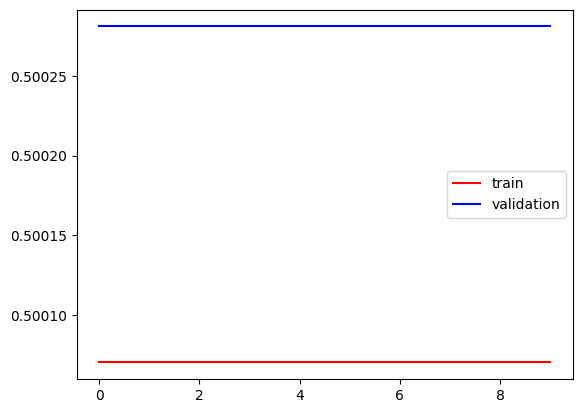

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['sparse_categorical_accuracy'],color='red',label='train')
plt.plot(history.history['val_sparse_categorical_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

1/1 [==============================] - 1s 1s/step


array([[0.]], dtype=float32)

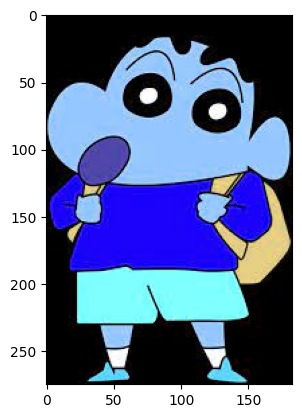

In [ ]:
import cv2
test_img = cv2.imread('/content/cartoon.jpeg')
plt.imshow(test_img)
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
model.predict(test_input)

1/1 [==============================] - 0s 28ms/step


array([[0.]], dtype=float32)

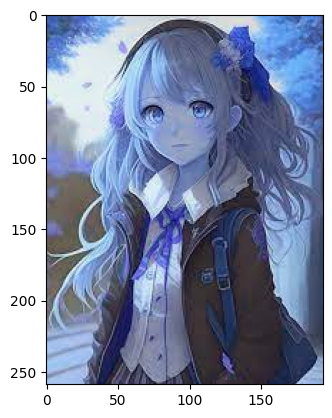

In [ ]:
test_img = cv2.imread('/content/anime.jpeg')
plt.imshow(test_img)
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
model.predict(test_input)

1/1 [==============================] - 0s 30ms/step


array([[0.]], dtype=float32)

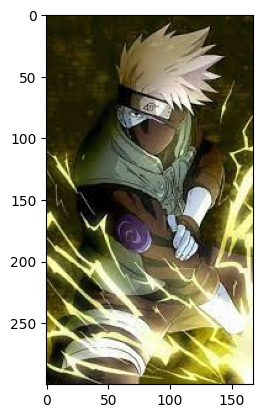

In [ ]:
test_img = cv2.imread('/content/anime2.jpeg')
plt.imshow(test_img)
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
model.predict(test_input)

In [ ]:
# 0 - > Cartoon